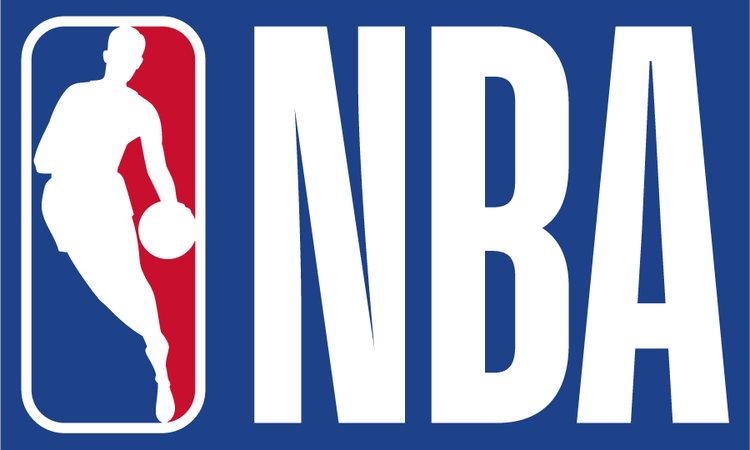

In [1]:
from IPython.display import Image
Image("/kaggle/input/nba-logo/NBA logo.png")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

# **UNDERSTANDING DATA**

In [3]:
df = pd.read_csv("/kaggle/input/202122-nba-season-active-nba-players/active_players_2.csv")
df

,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary
0,Juhann Begarin,Boston Celtics,SG,19,"6' 5""",6.50,185,NaN,NaN
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0
4,Tacko Fall,Boston Celtics,C,25,"7' 5""",7.50,311,UCF,NaN
...,...,...,...,...,...,...,...,...,...
553,Juwan Morgan,Utah Jazz,SF,24,"6' 7""",6.70,232,Indiana,NaN
554,Royce O'Neale,Utah Jazz,PF,28,"6' 4""",6.40,226,Baylor,8800000.0
555,Olumiye Oni,Utah Jazz,SG,24,"6' 5""",6.50,206,Yale,1782621.0
556,Eric Paschall,Utah Jazz,F,24,"6' 6""",6.60,255,Villanova,1782621.0


**POSITION OF PLAYER**

**PG - Point guard  SF - Small forward  SG - Shooting guard  PF - Power forward C - Center**


In [4]:
df.shape

(558, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      558 non-null    object 
 1   Team      558 non-null    object 
 2   Position  558 non-null    object 
 3   Age       558 non-null    int64  
 4   Height    558 non-null    object 
 5   Height_i  558 non-null    float64
 6   Weight    558 non-null    int64  
 7   College   485 non-null    object 
 8   Salary    445 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 39.4+ KB


# **DATA CLEANING**

In [6]:
pd.isnull(df).sum()

Name          0
Team          0
Position      0
Age           0
Height        0
Height_i      0
Weight        0
College      73
Salary      113
dtype: int64

In [7]:
df.dropna(inplace=True)
pd.isnull(df).sum()

Name        0
Team        0
Position    0
Age         0
Height      0
Height_i    0
Weight      0
College     0
Salary      0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 1 to 557
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      383 non-null    object 
 1   Team      383 non-null    object 
 2   Position  383 non-null    object 
 3   Age       383 non-null    int64  
 4   Height    383 non-null    object 
 5   Height_i  383 non-null    float64
 6   Weight    383 non-null    int64  
 7   College   383 non-null    object 
 8   Salary    383 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 29.9+ KB


# **DATA TRANSFORMATION**


*Creating a new column BMI (Body Mass Index)*



In [9]:
df.columns

Index(['Name', 'Team', 'Position', 'Age', 'Height', 'Height_i', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [10]:
df.describe()

,Age,Height_i,Weight,Salary
count,383.000000,383.000000,383.000000,3.830000e+02
mean,25.650131,6.501749,216.057441,8.760629e+06
std,4.262069,0.304269,23.380012,9.929530e+06
min,18.000000,5.110000,160.000000,9.252580e+05
25%,22.000000,6.300000,200.000000,1.782621e+06
50%,25.000000,6.500000,215.000000,4.347600e+06
75%,28.000000,6.700000,230.000000,1.180766e+07
max,41.000000,7.200000,284.000000,4.578097e+07


In [11]:
df[["Height"]].describe()

,Height
count,383
unique,16
top,"6' 5"""
freq,53


***Avg height is 6'5" after converting into inches = 75 inches***

In [12]:
Avg_Height = 75

**Formula for calculating 
BMI = (weight in pounds/ height**2)X703

In [13]:
df["BMI"] = (df["Weight"]/(Avg_Height**2))*703
df

,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary,BMI
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0,27.870044
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0,25.620444
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0,24.995556
5,Bruno Fernando,Boston Celtics,F,23,"6' 9""",6.90,240,Maryland,1782621.0,29.994667
6,Al Horford,Boston Celtics,C,35,"6' 9""",6.90,240,Florida,27000000.0,29.994667
...,...,...,...,...,...,...,...,...,...,...
552,Donovan Mitchell,Utah Jazz,SG,25,"6' 1""",6.10,215,Louisville,28103500.0,26.870222
554,Royce O'Neale,Utah Jazz,PF,28,"6' 4""",6.40,226,Baylor,8800000.0,28.244978
555,Olumiye Oni,Utah Jazz,SG,24,"6' 5""",6.50,206,Yale,1782621.0,25.745422
556,Eric Paschall,Utah Jazz,F,24,"6' 6""",6.60,255,Villanova,1782621.0,31.869333


# **EXPLORATORY DATA ANALYSIS**

In [14]:
df.columns

Index(['Name', 'Team', 'Position', 'Age', 'Height', 'Height_i', 'Weight',
       'College', 'Salary', 'BMI'],
      dtype='object')

In [15]:
df[['Age','Weight','BMI']].describe()

,Age,Weight,BMI
count,383.000000,383.000000,383.000000
mean,25.650131,216.057441,27.002379
std,4.262069,23.380012,2.921982
min,18.000000,160.000000,19.996444
25%,22.000000,200.000000,24.995556
50%,25.000000,215.000000,26.870222
75%,28.000000,230.000000,28.744889
max,41.000000,284.000000,35.493689


* **The above chart shows that the average age of players is 25 and the average BMI is 27.**


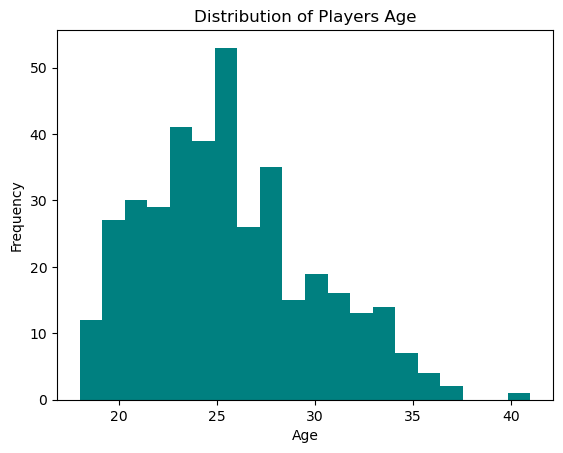

In [16]:
plt.hist(df['Age'],bins=20,color="teal")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Players Age')
plt.show()

* **The above histogram shows distributions of Players age and it shows most of the players lies between age group of 22-28**

<Figure size 1000x600 with 0 Axes>

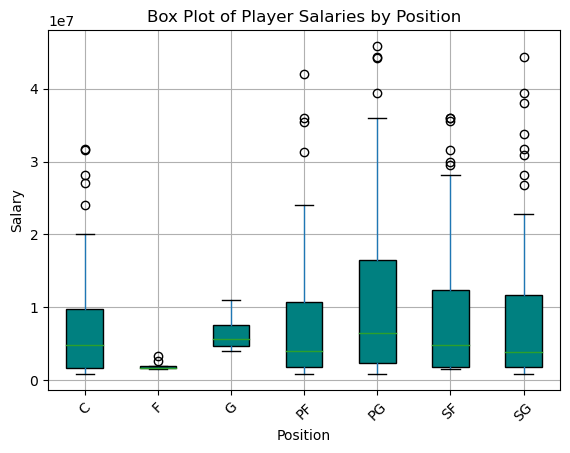

In [17]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Salary', by='Position',patch_artist = True, boxprops = dict(facecolor = "teal"))
plt.ylabel('Salary')
plt.title('Box Plot of Player Salaries by Position')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

* **The above box plot shows the player at point guard position gets the highest salary**

In [18]:
df['Position'].unique()

array(['SG', 'PG', 'F', 'C', 'SF', 'PF', 'G'], dtype=object)

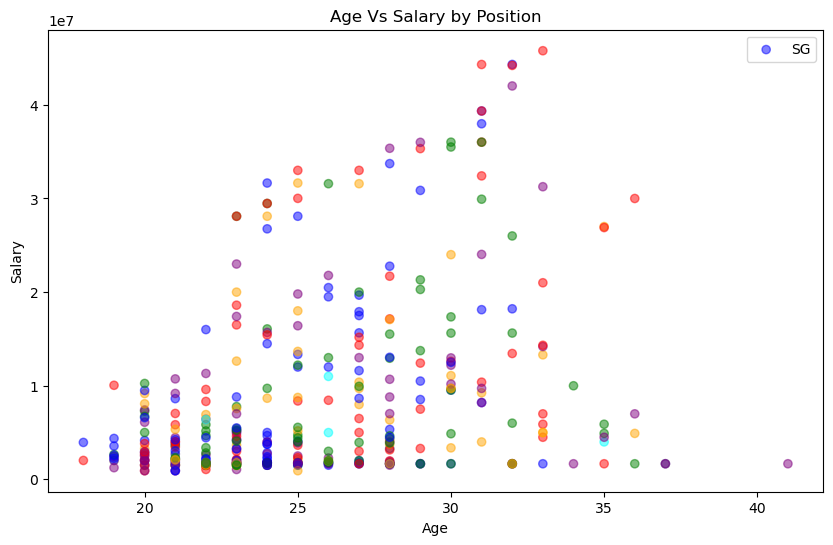

In [19]:
plt.figure(figsize=(10, 6))
colors = {'SG':'blue','PG':'red','C':'orange','F':'midnightblue','SF':'green', 'PF':'purple','G':'cyan'}
plt.scatter(df['Age'],df['Salary'], c = df['Position'].map(colors),alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age Vs Salary by Position')
plt.legend(colors)
plt.show()

In [20]:
#Top Players in terms of salary
Top_players=df.nlargest(10,'Salary')
print(Top_players)

                  Name                    Team Position  Age  Height  \
287      Stephen Curry   Golden State Warriors       PG   33   6' 3"   
29        James Harden           Brooklyn Nets       SG   32   6' 5"   
408          John Wall         Houston Rockets       PG   31   6' 3"   
336  Russell Westbrook      Los Angeles Lakers       PG   32   6' 3"   
25        Kevin Durant           Brooklyn Nets       PF   32  6' 10"   
308        Paul George    Los Angeles Clippers       SG   31   6' 8"   
529     Damian Lillard  Portland Trail Blazers       PG   31   6' 2"   
299      Klay Thompson   Golden State Warriors       SG   31   6' 6"   
64        Kemba Walker         New York Knicks       PG   31   6' 0"   
229       Jimmy Butler              Miami Heat       SF   31   6' 7"   

     Height_i  Weight           College      Salary        BMI  
287       6.3     185          Davidson  45780966.0  23.120889  
29        6.5     220     Arizona State  44310840.0  27.495111  
408       6.

* **The above DF shows that Stephen curry of Golden state warriors at point guard posiotion gets the highest salary**

In [21]:
#Top colleges showing participation strength
Top_college=df['College'].value_counts().nlargest(5)
print(Top_college)

Kentucky          27
Duke              23
Texas             11
UCLA              11
North Carolina    10
Name: College, dtype: int64


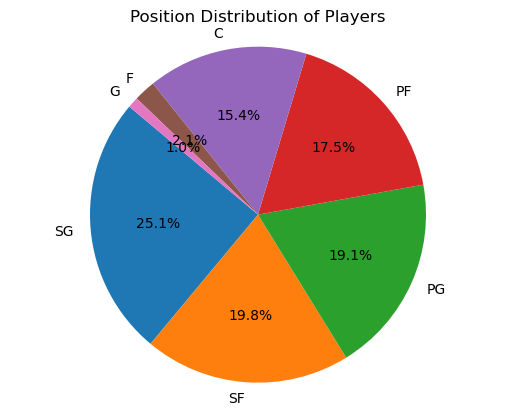

In [22]:
#Position Distribution using charts
position_counts = df['Position'].value_counts()
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Position Distribution of Players')
plt.axis('equal')
plt.show()


* **The above Pie charts gives the insight that the top position distribution of players goes to Shooting Guard.**

In [23]:
#Team Analysis:
avg_salary_by_team=df.groupby('Team')['Salary'].mean()
print(avg_salary_by_team)

Team
Atlanta Hawks             7.098474e+06
Boston Celtics            9.079508e+06
Brooklyn Nets             1.120133e+07
Charlotte Hornets         6.654358e+06
Chicago Bulls             1.016693e+07
Cleveland Cavaliers       8.705583e+06
Dallas Mavericks          5.832190e+06
Denver Nuggets            8.187211e+06
Detroit Pistons           6.220769e+06
Golden State Warriors     1.215337e+07
Houston Rockets           9.906296e+06
Indiana Pacers            9.339164e+06
Los Angeles Clippers      1.308449e+07
Los Angeles Lakers        1.040876e+07
Memphis Grizzlies         6.200200e+06
Miami Heat                9.353919e+06
Milwaukee Bucks           8.930985e+06
Minnesota Timberwolves    1.157992e+07
New Orleans Pelicans      7.381478e+06
New York Knicks           9.260849e+06
Oklahoma City Thunder     3.316273e+06
Orlando Magic             8.435958e+06
Philadelphia Sixers       1.046966e+07
Phoenix Suns              8.791667e+06
Portland Trail Blazers    1.083270e+07
Sacremento Kings    

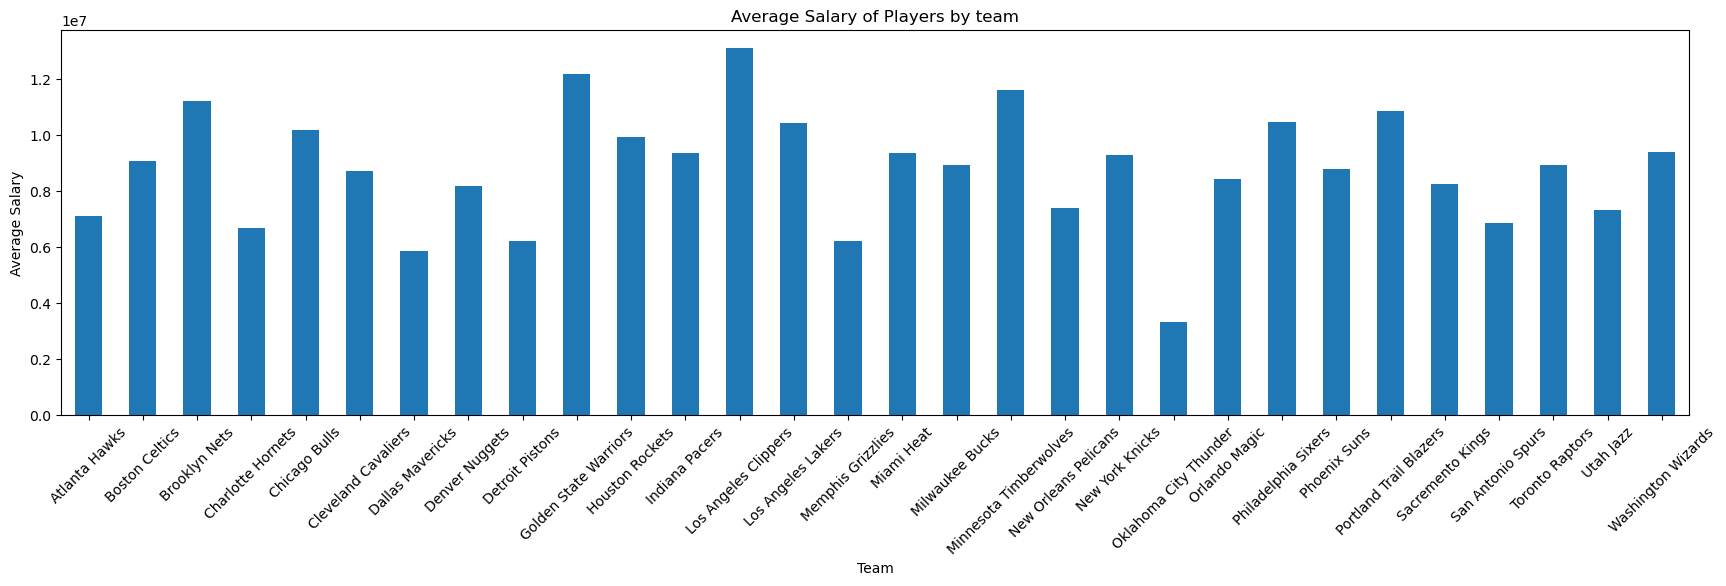

In [24]:
plt.figure(figsize=(21,5))
avg_salary_by_team.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.title('Average Salary of Players by team')
plt.xticks(rotation=45)
plt.show()

* **Above chart shows visuals of Team Los Angeles Clippers has highest salary among all teams**

# **CONCLUSION**
**From above data analysis we can conclude some interesting factors like**

* **Team with highest salary(Los Angeles Clippers)**

* **Most persons having position in SG(Shooting Guard)**

* **Top player having highest salary is Stephen Curry**